# Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$$


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть $w_0 + w_1 x + w_2 x^2 + ... + w_n x^n$) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты $w_0, ... w_n$ можно определить из следующей системы линейных уравнений:

$$\begin{cases}w_{0}+w_{1}x_{1}+w_{2}x_{1}^2+...+w_{n}x_{1}^n=f(x_{1})\\...\\w_{0}+w_{1}x_{n+1}+w_{2}x_{n+1}^2+...+w_{n}x_{n+1}^n=f(x_{n+1})\end{cases}$$

где через $x_1, ..., x_n, x_{n+1}$ обозначены точки, через которые проходит многочлен, а через $f(x_1), ..., f(x_n), f(x_{n+1})$ — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: $w_0, w_1, w_2, w_3$) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [1]:
import math
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

In [3]:
def f_approx(x, c):
    y = 0
    for i in range(len(c)):
        y = y + c[i] * x ** i
    return y

In [4]:
def fill_x(x):
    a = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            a[i,j] = x[i]**j
    return a

In [5]:
x = [1, 15]

a = fill_x(x)
b = [f(x) for x in x]
c = linalg.solve(a, b)

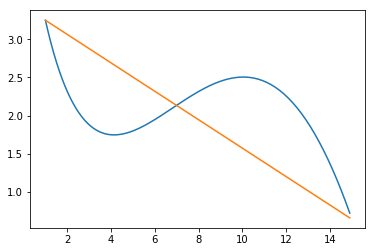

In [6]:
xplot = np.arange(1, 15, 0.1)

A = np.array([f(x) for x in xplot])
B = np.array([f_approx(x, c) for x in xplot])
plt.plot(xplot, A, '-')
plt.plot(xplot, B, '-')
plt.show()

In [7]:
np.sum(np.square(A - B))

79.396587913713034

In [11]:
f_approx(0, c)

3.4391451113923299

In [8]:
x = [1, 8, 15]

a = fill_x(x)
b = [f(x) for x in x]
c = linalg.solve(a, b)

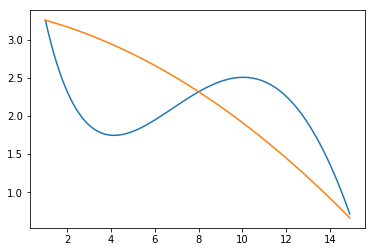

In [9]:
xplot = np.arange(1, 15, 0.1)

A = np.array([f(x) for x in xplot])
B = np.array([f_approx(x, c) for x in xplot])
plt.plot(xplot, A, '-')
plt.plot(xplot, B, '-')
plt.show()

In [10]:
np.sum(np.square(A - B))

76.076248074105663

In [11]:
x = [1, 4, 10, 15]

a = fill_x(x)
b = [f(x) for x in x]
c = linalg.solve(a, b)

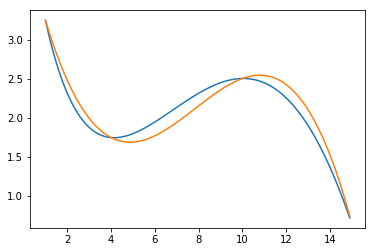

In [16]:
xplot = np.arange(1, 15, 0.1)

A = np.array([f(x) for x in xplot])
B = np.array([f_approx(x, c) for x in xplot])
plt.plot(xplot, [f(x) for x in xplot], '-')
plt.plot(xplot, [f_approx(x, c) for x in xplot], '-')
plt.show()

In [13]:
np.sum(np.square(A - B))

2.59938237546976

In [14]:
c

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])